In [25]:
#Loading data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/Dataset/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [29]:
# The data has been loaded correctly

In [30]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
#Checking for empty columns
(df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
# To drop the missing values, first we coerse the blank values into an integer so that we could get NaN 
# This inturn would make it easier to drop such data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [33]:
# Verifying 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
(df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
# Previewing unique values
for col in ['Contract', 'PaymentMethod', 'InternetService', 'Churn']:
    print(f"\n{col}: {df[col].unique()}")


Contract: ['Month-to-month' 'One year' 'Two year']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

InternetService: ['DSL' 'Fiber optic' 'No']

Churn: ['No' 'Yes']


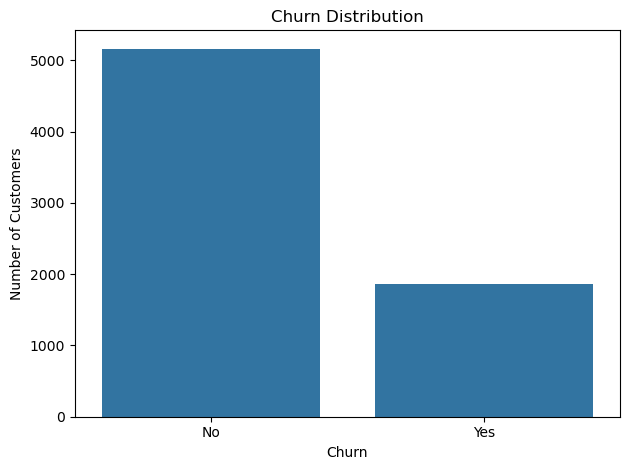

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/visuals/churn_distribution.png")
plt.show()


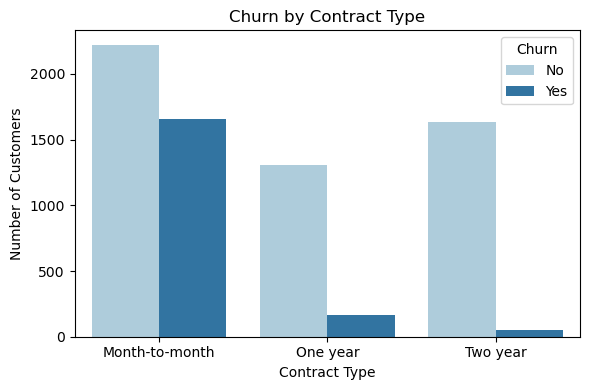

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Paired')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/visuals/churn_by_contract.png")
plt.show()


In [38]:
# Tenure buckets
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Churn % per tenure group (fully future-proof)
churn_by_tenure = (
    df.groupby(['tenure_group', 'Churn'], observed=True)
    .size()
    .groupby(level=0, observed=True)
    .apply(lambda x: x / x.sum())
    .unstack()
)


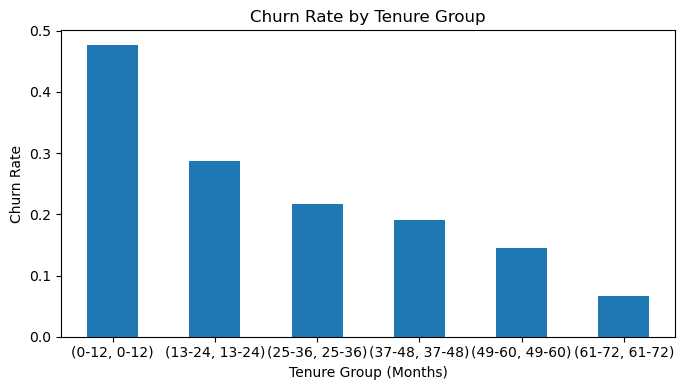

In [50]:
# Plotting Churn Rate by Tenure Group
churn_by_tenure['Yes'].plot(kind='bar', figsize=(7,4))
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/visuals/churn_by_tenure.png")
plt.show()


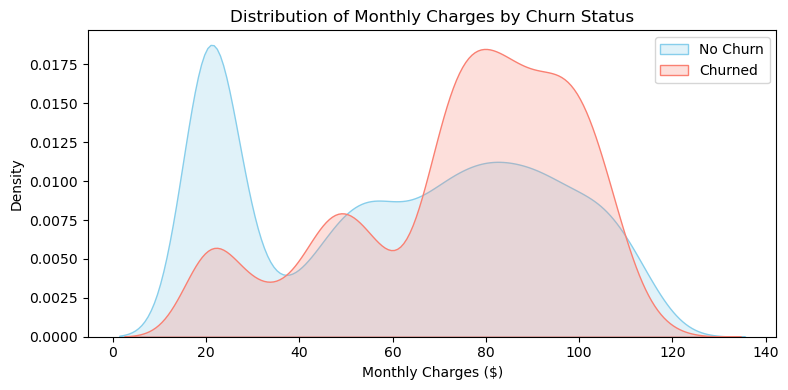

In [51]:
# Plotting the Distribution of Monthly Charges by Churn Status
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', fill=True, color='skyblue')
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churned', fill=True, color='salmon')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/visuals/monthly_charges_kde.png")
plt.show()


In [41]:
# Customer segmentation by value

In [42]:
#df['TotalCharges'].min()
df['TotalCharges'].max()

8684.8

In [43]:
# Creating customer value segments
max_val = df['TotalCharges'].max()
bins = [0, 1000, 3000, max_val]
labels = ['Low Value', 'Medium Value', 'High Value']
df['value_segment'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=True)

In [44]:
# Calculating churn % by value segment
churn_by_value = (
    df.groupby(['value_segment', 'Churn'], observed=True)
    .size()
    .reset_index(name='count')
)

In [45]:
churn_by_value['total'] = churn_by_value.groupby('value_segment', observed=True)['count'].transform('sum')
churn_by_value['churn_rate'] = churn_by_value['count'] / churn_by_value['total']

In [46]:
churn_rate_yes = churn_by_value[churn_by_value['Churn'] == 'Yes']

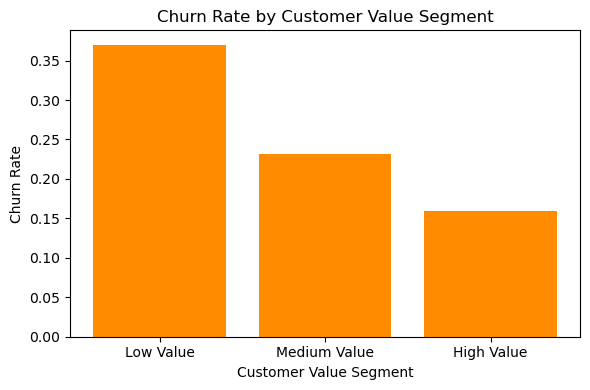

In [52]:
plt.figure(figsize=(6, 4))
plt.bar(churn_rate_yes['value_segment'], churn_rate_yes['churn_rate'], color='darkorange')
plt.title('Churn Rate by Customer Value Segment')
plt.xlabel('Customer Value Segment')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("/Users/pratyushpranjal/Documents/GitHub/customer_churn_analysis/visuals/value_segment_churn.png")
plt.show()
